In [3]:
import pandas as pd

df = pd.read_csv('IMDB-Dataset.csv')

print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
print(df.columns)

print(df['review'][0])

Index(['review', 'sentiment'], dtype='object')
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would sa

In [18]:
import re
from wordcloud import STOPWORDS

def clean_text(text):

    text = re.sub(r'[^A-Za-z\s]', '', str(text))

    text = text.lower()

    stopwords = set(STOPWORDS)
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

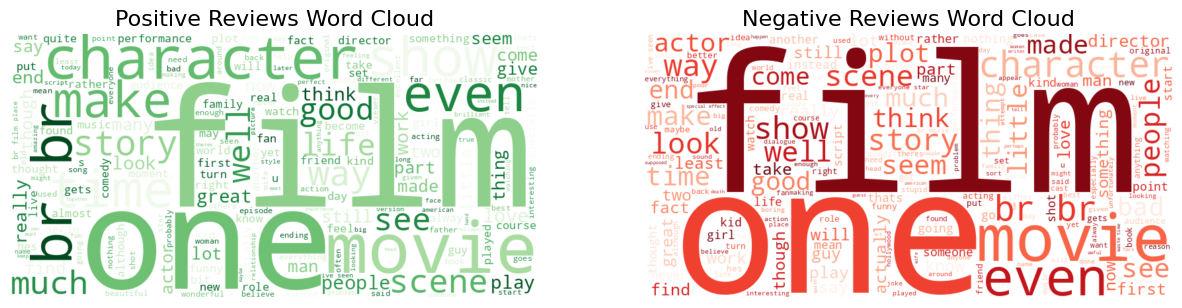

In [22]:
df['cleaned_review'] = df['review'].apply(clean_text)
positive_text = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review'])
negative_text = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review'])


positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(15, 7))


plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud", fontsize=16)


plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud", fontsize=16)

plt.show()



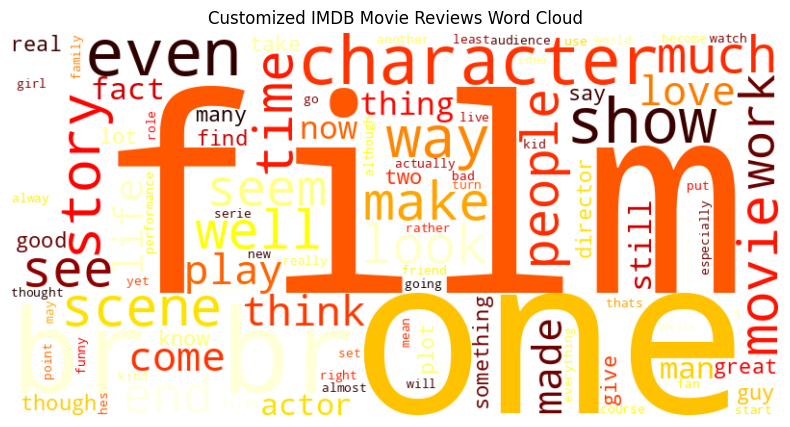

In [23]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='hot').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Customized IMDB Movie Reviews Word Cloud")
plt.show()